In [61]:
import pandas as pd

In [62]:
import numpy as np

In [63]:
import os

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from glob import glob

In [66]:
from math import factorial

In [92]:
from sklearn import preprocessing

In [67]:
RAW_DATA_FOLDER_PATH = "../data/raw_data"

In [68]:
max_nb_data_row = 35

In [69]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError as msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [97]:
processed_dataframes = {}
for csv_file_path in glob(os.path.join(RAW_DATA_FOLDER_PATH, "*.csv")):
    file_name = os.path.basename(csv_file_path)
    label = file_name.split(".")[0]
    
    df = pd.read_csv(csv_file_path, header=0)
    
    df_row_nb = len(df.index)
    sample_rate = int(np.ceil(df_row_nb/max_nb_data_row))
    df = df.iloc[::sample_rate, :]
    df_row_nb = len(df.index)
    
    X = df["x"].values
    Y = df["y"].values
    Z = df["z"].values
    
    nb_of_zeros_to_fill_with = max_nb_data_row - df_row_nb
    
    X = np.pad(X, (0, nb_of_zeros_to_fill_with), "constant")
    Y = np.pad(Y, (0, nb_of_zeros_to_fill_with), "constant")
    Z = np.pad(Z, (0, nb_of_zeros_to_fill_with), "constant")
    
    df = pd.DataFrame()
    df["x"] = savitzky_golay(X, 7, 3)
    df["y"] = savitzky_golay(Y, 7, 3)
    df["z"] = savitzky_golay(Z, 7, 3)
    
    if not label in processed_dataframes:
        processed_dataframes[label] = []
        
    processed_dataframes[label].append(df)

In [98]:
processed_dataframes.keys()

dict_keys(['circle', 'up_arrow'])

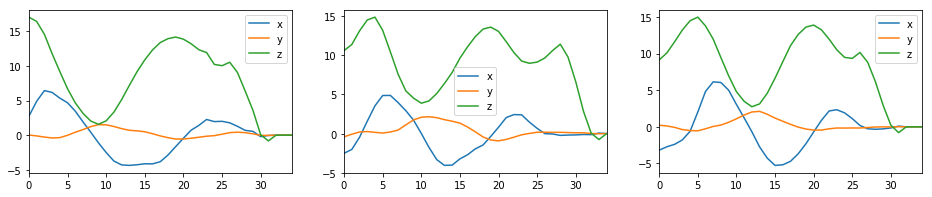

In [103]:
fig, axs = plt.subplots(1,3, figsize=(16,3))
plt.grid()
processed_dataframes["circle"][0].plot(ax=axs[0])
processed_dataframes["circle"][1].plot(ax=axs[1])
processed_dataframes["circle"][2].plot(ax=axs[2])

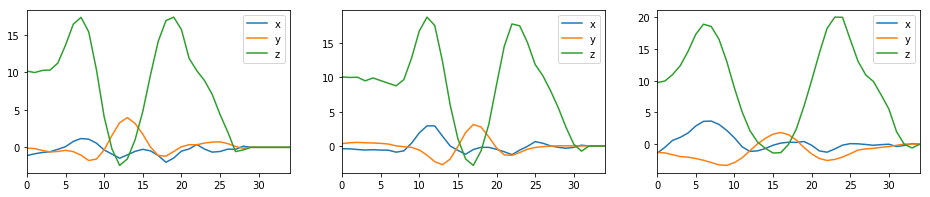

In [102]:
fig, axs = plt.subplots(1,3, figsize=(16,3))
plt.grid()
processed_dataframes["up_arrow"][0].plot(ax=axs[0])
processed_dataframes["up_arrow"][1].plot(ax=axs[1])
processed_dataframes["up_arrow"][2].plot(ax=axs[2])